In [1]:
#!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

In [1]:
!git clone https://github.com/niazwazir/SRCNN-Keras.git

Cloning into 'SRCNN-Keras'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 99 (delta 7), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (99/99), done.


In [2]:
cd SRCNN-Keras/

/content/SRCNN-Keras


In [3]:
!ls

baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
Brain.jpg
butterfly_GT.bmp
head_GT.bmp
Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
prepare_data.py
project.gif
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
Set5
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
subpixel.py
text
woman_GT.bmp
yang91.zip


In [4]:
!unzip yang91.zip

Archive:  yang91.zip
   creating: yang91/
  inflating: yang91/tt9.bmp          
  inflating: yang91/tt8.bmp          
  inflating: yang91/tt7.bmp          
  inflating: yang91/tt6.bmp          
  inflating: yang91/tt5.bmp          
  inflating: yang91/tt4.bmp          
  inflating: yang91/tt3.bmp          
  inflating: yang91/tt27.bmp         
  inflating: yang91/tt26.bmp         
  inflating: yang91/tt25.bmp         
  inflating: yang91/tt24.bmp         
  inflating: yang91/tt23.bmp         
  inflating: yang91/tt22.bmp         
  inflating: yang91/tt21.bmp         
  inflating: yang91/tt20.bmp         
  inflating: yang91/tt2.bmp          
  inflating: yang91/tt19.bmp         
  inflating: yang91/tt18.bmp         
  inflating: yang91/tt17.bmp         
  inflating: yang91/tt16.bmp         
  inflating: yang91/tt15.bmp         
  inflating: yang91/tt14.bmp         
  inflating: yang91/tt13.bmp         
  inflating: yang91/tt12.bmp         
  inflating: yang91/tt10.bmp         
  inflat

In [5]:
!ls

baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
Brain.jpg
butterfly_GT.bmp
head_GT.bmp
Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
prepare_data.py
project.gif
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
Set5
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
subpixel.py
text
woman_GT.bmp
yang91
yang91.zip


In [6]:
!rm -r *.zip

In [7]:
!ls

baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
Brain.jpg
butterfly_GT.bmp
head_GT.bmp
Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
prepare_data.py
project.gif
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
Set5
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
subpixel.py
text
woman_GT.bmp
yang91


In [8]:
cd ..

/content


In [9]:
!ls

sample_data  SRCNN-Keras


In [10]:
#!unzip "DIV2K_train_HR.zip"

In [11]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [12]:
!ls

sample_data  SRCNN-Keras


In [13]:
############### IF YOU DON'T WANT TO TRAIN :
############### Load my github model and use the output patch prediction and merging code from this same notebook lateron

In [15]:
DATADIR = "SRCNN-Keras/Set5"
DATADIR2 = "SRCNN-Keras/yang91"
#DATADIR2 = "DIV2K_train_HR"


In [16]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [17]:
scale = 2
req_size = 20
inp_size = int(req_size/scale)
stride = 15

X=[]
labels=[]

for filera in os.listdir(DATADIR):
  readpath = os.path.join(DATADIR,filera)
  img = cv2.imread(readpath)
  img = np.asarray(img)
  shapes = img.shape
  for i in range(0, shapes[0]-req_size+1, stride):
    for j in range(0, shapes[1]-req_size+1,stride):
      subimage_HR = img[i:i+req_size, j:j+req_size]
      #cv2_imshow(subimage_HR)
      subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
      X.append(subimage_LR)
      labels.append(subimage_HR)

counta=0
for filera in os.listdir(DATADIR2):
  counta=counta+1
  if(counta==300):
    break
  readpath = os.path.join(DATADIR2,filera)
  img = cv2.imread(readpath)
  img = np.asarray(img)
  shapes = img.shape
  for i in range(0, shapes[0]-req_size+1, stride):
    for j in range(0, shapes[1]-req_size+1,stride):
      subimage_HR = img[i:i+req_size, j:j+req_size]
      #cv2_imshow(subimage_HR)
      subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
      X.append(subimage_LR)
      labels.append(subimage_HR)

In [18]:
X = np.asarray(X)
labels = np.asarray(labels)
print(labels.shape)
print(X.shape)

(21150, 20, 20, 3)
(21150, 10, 10, 3)


In [19]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input,Conv2DTranspose, Activation,add
from tensorflow.keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD

In [20]:
alpha = 0.85
def basic_mse(y_true, y_pred):
  pred = tf.image.sobel_edges(y_pred)
  true = tf.image.sobel_edges(y_true)
  lossmse = tf.reduce_mean(tf.square(y_pred-y_true))
  lossedge = tf.reduce_mean(tf.square(pred-true))
  return alpha*lossmse + (1-alpha)*lossedge

In [21]:
d=64
s=12
m=3

inputlayer = tf.keras.layers.Input(shape=(None,None,3))
x = Conv2D(filters=d, strides=(1,1), kernel_size=7 ,padding="same")(inputlayer)
x = LeakyReLU(alpha=0.2)(x)

#the layer to reduce feature maps from d to s
x = Conv2D(filters=s, kernel_size=(1, 1),padding="same")(x)
x = LeakyReLU(alpha=0.2)(x)

#the middle m layers
for i in range(m):
  x = Conv2D(filters=s,kernel_size=(3, 3),padding="same")(x)
  x = LeakyReLU(alpha=0.1)(x)

x = Conv2D(filters=d, kernel_size=(1, 1), padding="same")(x)
x = LeakyReLU(alpha=0.1)(x)


#final expanding layer of the model 3 channels for RGB
y = Conv2DTranspose(filters=3, kernel_size = (9,9), strides = (scale,scale), padding="same",activation=None)(x)

model = Model(inputs=inputlayer , outputs = y)

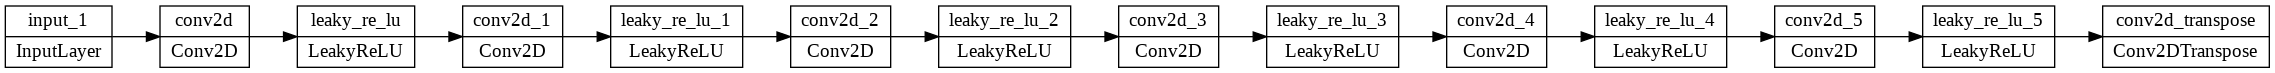

In [22]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

In [23]:
def wazir_loss(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)

In [28]:
def psnr(y_true,y_pred):
    return tf.image.psnr(y_true,y_pred,100)
def ssim(y_true,y_pred):
    return tf.image.ssim(y_true,y_pred,1.0)
def mean_squared_error(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(y_true, y_pred)

In [29]:
model.compile(loss='mse', optimizer='adam', metrics=[wazir_loss,psnr,ssim,mean_squared_error]) 

In [30]:
filename='log.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

In [31]:
history=model.fit(X, labels,
              batch_size=32,
              epochs=5,
              callbacks=[history_logger],
              validation_data=(X, labels),
              shuffle=True)

Epoch 1/5
661/661 [==============================] - 7s 9ms/step - loss: 152.9241 - wazir_loss: 152.9239 - psnr: 22.3088 - ssim: 0.7266 - mean_squared_error: 152.9239 - val_loss: 98.6000 - val_wazir_loss: 98.6000 - val_psnr: 23.3082 - val_ssim: 0.7487 - val_mean_squared_error: 98.6000
Epoch 2/5
661/661 [==============================] - 6s 9ms/step - loss: 100.5854 - wazir_loss: 100.5854 - psnr: 22.9667 - ssim: 0.7528 - mean_squared_error: 100.5854 - val_loss: 97.7463 - val_wazir_loss: 97.7464 - val_psnr: 23.0195 - val_ssim: 0.7560 - val_mean_squared_error: 97.7464
Epoch 3/5
661/661 [==============================] - 6s 9ms/step - loss: 104.0248 - wazir_loss: 104.0248 - psnr: 22.8568 - ssim: 0.7541 - mean_squared_error: 104.0248 - val_loss: 91.7541 - val_wazir_loss: 91.7540 - val_psnr: 23.7454 - val_ssim: 0.7637 - val_mean_squared_error: 91.7540
Epoch 4/5
661/661 [==============================] - 6s 9ms/step - loss: 99.3321 - wazir_loss: 99.3322 - psnr: 22.9327 - ssim: 0.7606 - mean_s

In [32]:
!ls

log.csv  model.png  sample_data  SRCNN-Keras


In [33]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss Curves')

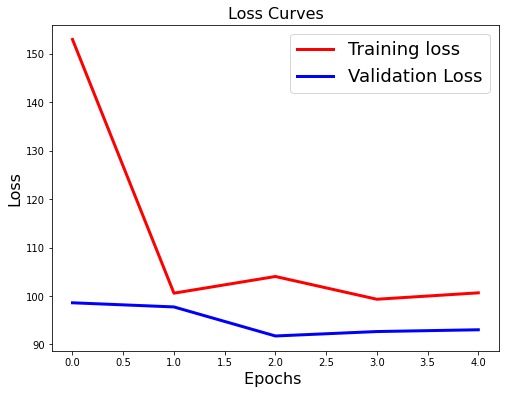

In [35]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [38]:
def psnr_calc():
  testimg = []
  #GT = cv2.imread("/content/drive/My Drive/dataset/suparesthing/test/set5/butterfly.png")
  GT = cv2.imread("SRCNN-Keras/baby_x2_GT.png")
  GT = np.asarray(GT)
  h = GT.shape[0]
  l = GT.shape[1]
  #print(GT.shape)
  img1 = cv2.resize(GT,(int(l/2),int(h/2)),interpolation = cv2.INTER_CUBIC)
  img1 = np.asarray(img1)
  testimg.append(img1)
  testimg = np.asarray(testimg)
  print(testimg.shape)
  fin =(model.predict(testimg)[0])
  inp = cv2.resize(img1,(l,h),interpolation = cv2.INTER_CUBIC)
  GT = GT[0:fin.shape[0],0:fin.shape[1],:]
  #mse = np.square(np.subtract(GT,inp)).mean()
  mse = np.square(np.subtract(GT, fin)).mean()
  cv2_imshow(inp)
  cv2_imshow(fin)
  cv2_imshow(GT)
  import math
  psnr = 20*math.log(255.0,10) - 10*(math.log(mse,10))
  return psnr

(1, 256, 256, 3)


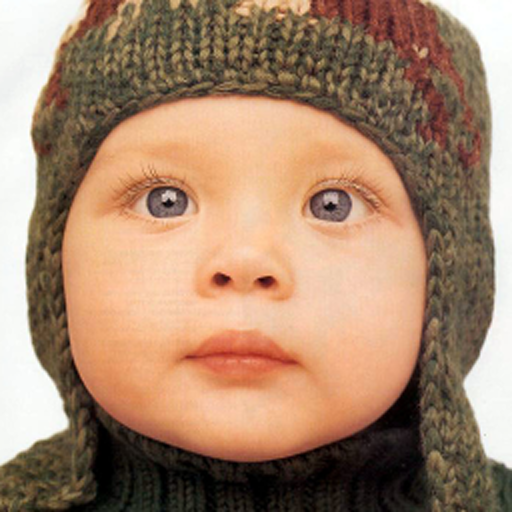

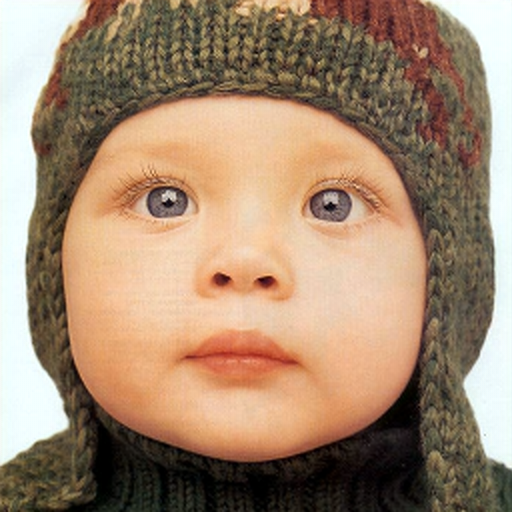

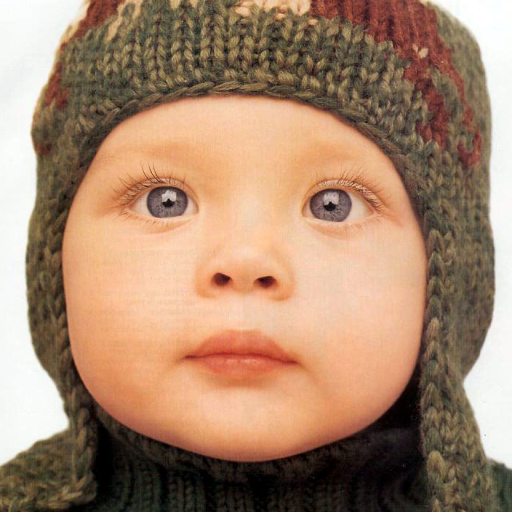

32.79462072421089


In [39]:
ps1 = psnr_calc()
print(ps1)

In [40]:
34.99243854909264

34.99243854909264

In [41]:
###########PREVIOUS SAVED log.csv SHOULD DELETE
from google.colab import files
files.download('log.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
model.save("/content/drive/My Drive/dataset/suparesthing/model2_FCN_FSRCNN.h5")